In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from script.data_loading import get_path, study_info
from script.junctions import junctions_and_count

from definitions import brca1

In [2]:
study_info.head()

,splice,expression,wgs_brass,wgs_pindel,wgs_caveman,total_size
case_id,,,,,,
c1442467-d618-435f-8792-b1a18f696f1a,65c868ba-94ed-43f2-bfd1-814979ee9486.rna_seq.s...,65c868ba-94ed-43f2-bfd1-814979ee9486.rna_seq.a...,c2603e63-fa7d-4ebc-936e-bed52cc932e4.wgs.BRASS...,c2603e63-fa7d-4ebc-936e-bed52cc932e4.wgs.sange...,c2603e63-fa7d-4ebc-936e-bed52cc932e4.wgs.CaVEM...,95698959
9435447e-d65f-408b-863b-6576b1d652dd,7c9a2493-5667-48ec-8998-81e13722b4ab.rna_seq.s...,7c9a2493-5667-48ec-8998-81e13722b4ab.rna_seq.a...,fb4526f0-ee99-46aa-a0df-f125a460b0a3.wgs.BRASS...,fb4526f0-ee99-46aa-a0df-f125a460b0a3.wgs.sange...,fb4526f0-ee99-46aa-a0df-f125a460b0a3.wgs.CaVEM...,87714708
0bf6e772-1aa1-4f54-9a50-c1414e2f22f3,1a3dcc95-64bf-4886-9807-9511b24f30af.rna_seq.s...,1a3dcc95-64bf-4886-9807-9511b24f30af.rna_seq.a...,a30866df-bce8-46ff-8918-bfa7956fdfbc.wgs.BRASS...,a30866df-bce8-46ff-8918-bfa7956fdfbc.wgs.sange...,a30866df-bce8-46ff-8918-bfa7956fdfbc.wgs.CaVEM...,96440606
0adf59c6-581a-475d-a2f4-40aa40060b5b,9d025af7-ba40-4329-9308-d039aaad900b.rna_seq.s...,9d025af7-ba40-4329-9308-d039aaad900b.rna_seq.a...,aa368df9-0840-4619-86d3-46bf56179fee.wgs.BRASS...,aa368df9-0840-4619-86d3-46bf56179fee.wgs.sange...,aa368df9-0840-4619-86d3-46bf56179fee.wgs.CaVEM...,95034341
0045349c-69d9-4306-a403-c9c1fa836644,36125e17-48fd-4eea-874c-ed2e2e218402.rna_seq.s...,36125e17-48fd-4eea-874c-ed2e2e218402.rna_seq.a...,4598a0fe-4bbf-413d-8f9b-db38d4f213d5.wgs.BRASS...,4598a0fe-4bbf-413d-8f9b-db38d4f213d5.wgs.sange...,4598a0fe-4bbf-413d-8f9b-db38d4f213d5.wgs.CaVEM...,90039272


## Find and aggregate junction use

In [3]:
junctions = pd.DataFrame()
for case_id in study_info.index:
    new_j, count = junctions_and_count(case_id, brca1)
    new_j = (new_j / count).T
    if junctions.empty:
        junctions = new_j
    else:
        junctions = pd.concat([junctions, new_j], ignore_index=True)
junctions = junctions.reindex(sorted(junctions.columns), axis=1).fillna(0)

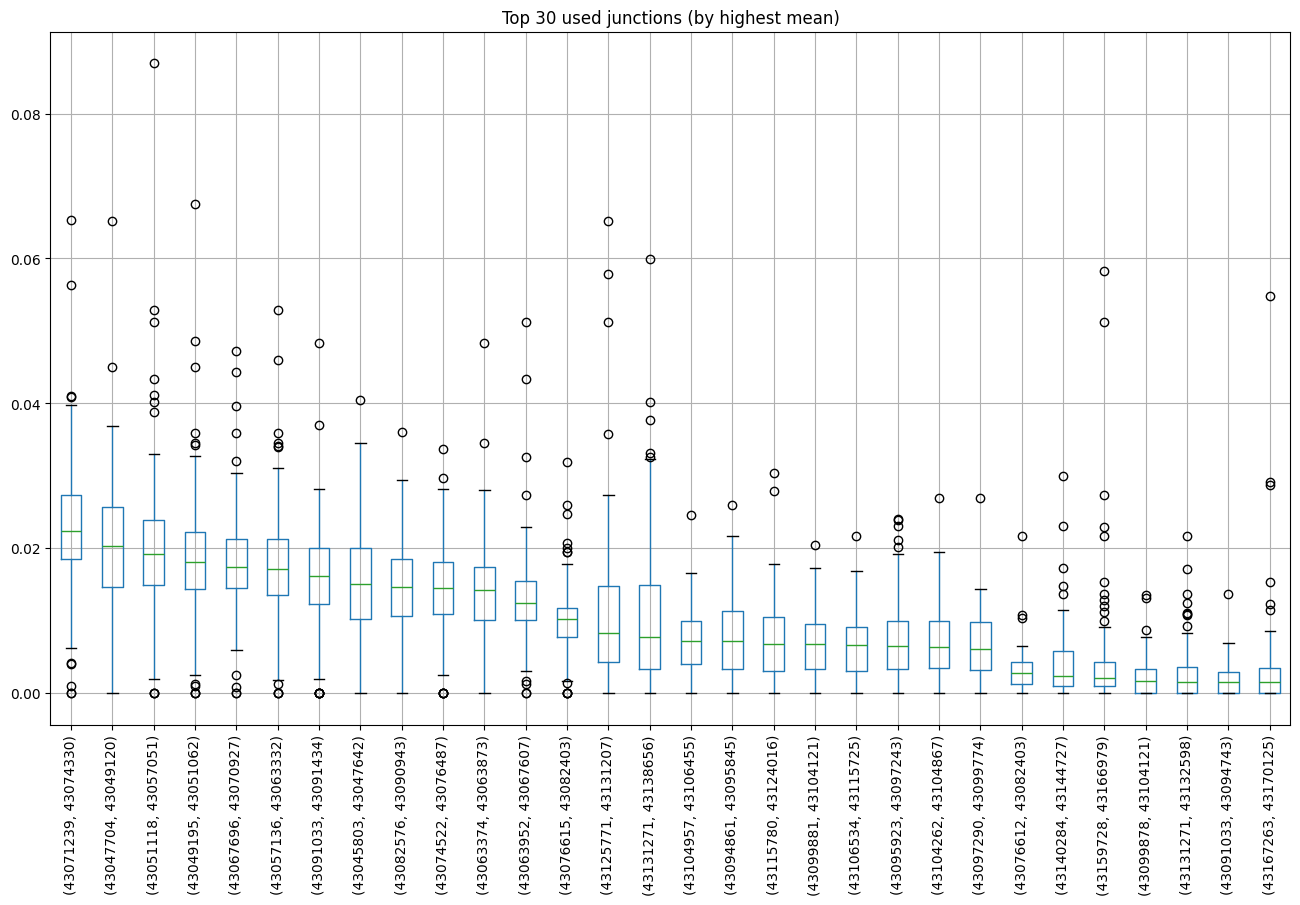

In [4]:
top_n = 30
junctions\
    .reindex(junctions.median().sort_values(ascending=False).index, axis=1)\
    .iloc[:,:top_n]\
    .boxplot(figsize=(16, 9), rot=90)
plt.title(f'Top {top_n} used junctions (by highest mean)')
plt.show()

## Aggregate donor/acceptor probabilities

In [5]:
donor_probs = junctions.T.groupby(level=0).sum().T
donor_probs

intron_donor,43044745,43045803,43047704,43049195,43049893,43049961,43050191,43050606,43051110,43051118,...,43164764,43164813,43164831,43164839,43167151,43167222,43167251,43167263,43167850,43168269
0,0.0,0.012384,0.013932,0.023220,0.0,0.0,0.000000,0.0,0.0,0.018576,...,0.0,0.003096,0.006192,0.0,0.000000,0.0,0.000000,0.000000,0.001548,0.0
1,0.0,0.013433,0.005970,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.001493,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.008704,0.018375,0.020309,0.0,0.0,0.000967,0.0,0.0,0.016441,...,0.0,0.000000,0.000967,0.0,0.003868,0.0,0.002901,0.001934,0.000000,0.0
3,0.0,0.023256,0.020349,0.030523,0.0,0.0,0.000000,0.0,0.0,0.010174,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.007267,0.004360,0.000000,0.0
4,0.0,0.016611,0.025471,0.012182,0.0,0.0,0.000000,0.0,0.0,0.023256,...,0.0,0.003322,0.002215,0.0,0.001107,0.0,0.001107,0.002215,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.017372,0.030402,0.015201,0.0,0.0,0.000000,0.0,0.0,0.023887,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.001086,0.000000,0.0
96,0.0,0.014778,0.032841,0.021346,0.0,0.0,0.000000,0.0,0.0,0.018062,...,0.0,0.004926,0.000000,0.0,0.003284,0.0,0.001642,0.003284,0.000000,0.0
97,0.0,0.007407,0.011111,0.022222,0.0,0.0,0.000000,0.0,0.0,0.016667,...,0.0,0.000000,0.001852,0.0,0.000000,0.0,0.001852,0.000000,0.000000,0.0
98,0.0,0.028961,0.017036,0.023850,0.0,0.0,0.000000,0.0,0.0,0.013629,...,0.0,0.008518,0.000000,0.0,0.011925,0.0,0.006814,0.003407,0.015332,0.0


In [6]:
acceptor_probs = junctions.T.groupby(level=1).sum().T
acceptor_probs

intron_acceptor,43044774,43047642,43049120,43049781,43050061,43051062,43057051,43058223,43063332,43063873,...,43159546,43159583,43162629,43166979,43167733,43168169,43169166,43169756,43170125,43170146
0,0.0,0.012384,0.013932,0.0,0.000000,0.023220,0.018576,0.0,0.027864,0.018576,...,0.0,0.000000,0.000000,0.017028,0.0,0.000000,0.0,0.000000,0.006192,0.0
1,0.0,0.013433,0.005970,0.0,0.000000,0.000000,0.000000,0.0,0.026866,0.000000,...,0.0,0.000000,0.000000,0.001493,0.0,0.000000,0.0,0.000000,0.000000,0.0
2,0.0,0.008704,0.017408,0.0,0.000967,0.021277,0.016441,0.0,0.021277,0.013540,...,0.0,0.000967,0.000000,0.003868,0.0,0.000000,0.0,0.000000,0.012573,0.0
3,0.0,0.023256,0.020349,0.0,0.000000,0.030523,0.010174,0.0,0.008721,0.021802,...,0.0,0.000000,0.000000,0.005814,0.0,0.000000,0.0,0.004360,0.014535,0.0
4,0.0,0.016611,0.025471,0.0,0.000000,0.012182,0.023256,0.0,0.017719,0.005537,...,0.0,0.001107,0.000000,0.012182,0.0,0.000000,0.0,0.000000,0.004430,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.017372,0.030402,0.0,0.000000,0.015201,0.023887,0.0,0.015201,0.013029,...,0.0,0.000000,0.000000,0.003257,0.0,0.000000,0.0,0.000000,0.001086,0.0
96,0.0,0.014778,0.032841,0.0,0.000000,0.021346,0.018062,0.0,0.024631,0.024631,...,0.0,0.000000,0.000000,0.008210,0.0,0.000000,0.0,0.000000,0.011494,0.0
97,0.0,0.007407,0.009259,0.0,0.000000,0.024074,0.016667,0.0,0.011111,0.014815,...,0.0,0.000000,0.001852,0.007407,0.0,0.000000,0.0,0.000000,0.003704,0.0
98,0.0,0.028961,0.017036,0.0,0.000000,0.020443,0.017036,0.0,0.030664,0.018739,...,0.0,0.001704,0.000000,0.022147,0.0,0.003407,0.0,0.003407,0.047700,0.0
